### Análise de Modelos de Classificação

#### Objetivo:
Encontrar um modelo de classificação que possa prever a qualidade de vinhos tintos ou brancos com base em seus atributos físico-químicos. Você deverá trabalhar todas as etapas de um pipeline de aprendizado de máquina, desde a análise exploratória até a avaliação do modelo.

##### Descrição do Dataset:
Utilizaremos o "Wine Quality Dataset" disponível no repositório da UCI Machine Learning Repository. Este dataset contém informações sobre vinhos tintos e brancos, descritos por características físico-químicas (como acidez, pH e densidade) e uma variável de qualidade avaliada por especialistas.

##### Variável Alvo:
- **quality**: Nota atribuída ao vinho, variando de 3 a 9.  
  Para simplificar o problema, transformaremos a variável `quality` em binária:
  - **Qualidade alta**: `quality >= 7` → Classe 1
  - **Qualidade baixa**: `quality < 7` → Classe 0


#### Análise Exploratória de Dados (EDA)

##### Passos:
1. **Carregue os dados** no Python utilizando `pandas`.

In [1]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

2. **Explore o dataset**:
   - Visualize as primeiras linhas com `head()`.
   - Exiba as dimensões do dataset.
   - Verifique se há valores ausentes ou inconsistências.

In [2]:
data = wine_quality.data.original
data.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


3. **Crie gráficos** para entender:
   - A distribuição de `quality`.
   - As relações entre as variáveis físico-químicas e a qualidade do vinho:
     - **Gráficos de dispersão**: Por exemplo, `alcohol` vs `quality`.
     - **Boxplots**: Por exemplo, comparar `density` entre vinhos de qualidade alta e baixa.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

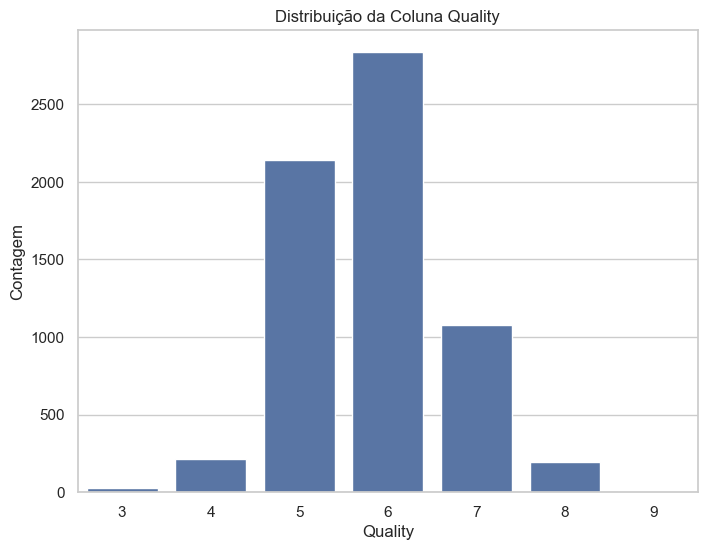

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [5]:
# Ajuste do estilo dos gráficos
sns.set(style="whitegrid")

# Gráfico de distribuição da coluna 'quality'
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=data)
plt.title('Distribuição da Coluna Quality')
plt.xlabel('Quality')
plt.ylabel('Contagem')
plt.show()
data["quality"].value_counts()

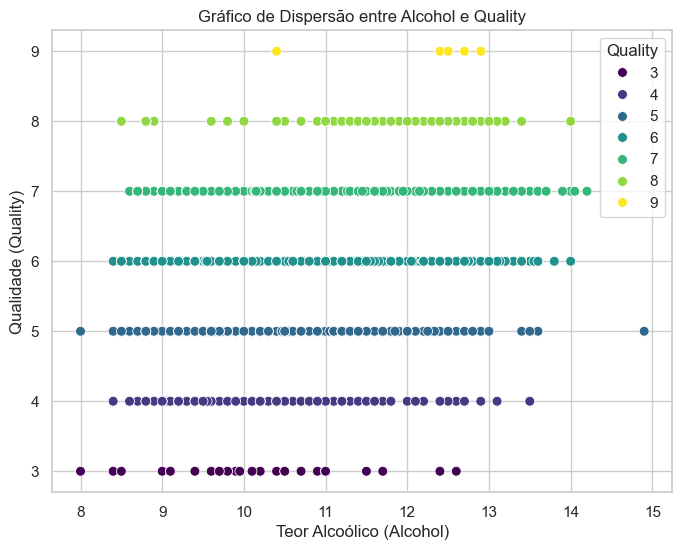

In [6]:
# Gráfico de dispersão entre 'alcohol' e 'quality'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='alcohol', y='quality', data=data, hue='quality', palette='viridis', s=50)
plt.title('Gráfico de Dispersão entre Alcohol e Quality')
plt.xlabel('Teor Alcoólico (Alcohol)')
plt.ylabel('Qualidade (Quality)')
plt.legend(title='Quality')
plt.show()

C:\Users\conta\AppData\Local\Temp\ipykernel_10732\1111174306.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='density', data=data, palette='bright')


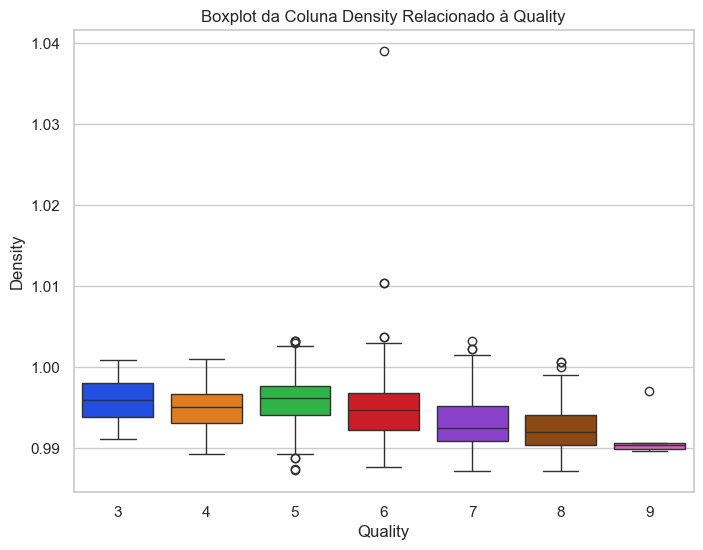

In [7]:
# Boxplot de 'quality' em relação à coluna 'density'
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='density', data=data, palette='bright')
plt.title('Boxplot da Coluna Density Relacionado à Quality')
plt.xlabel('Quality')
plt.ylabel('Density')
plt.show()

#### Pré-processamento

1. **Criação da variável-alvo**:
   - Converta a coluna `quality` em uma variável binária (0 ou 1).

In [8]:
data['quality'].mean()

5.818377712790519

In [9]:
# media se aproxima de 6 então escolhi ele como valor de corte , vou fazer com a coluna color tambem.
data['quality'] = data['quality'].apply(lambda x: 1 if x >= 6 else 0)
data['color'] = data['color'].apply(lambda x: 1 if x == "red" else 0)
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,1


2. **Normalização**:
   - Padronize as variáveis contínuas para garantir escalas uniformes.

In [10]:
# Padronização (z-score)
from sklearn.preprocessing import StandardScaler
colunas = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
scaler_standard = StandardScaler()
data_norm= data.copy()
data_norm[colunas] = scaler_standard.fit_transform(data_norm[colunas])
data_norm.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,0,1
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,0,1
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,0,1
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,1,1
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,0,1


3. **Divisão do dataset**:
   - Separe os dados em conjuntos de treino (80%) e teste (20%) utilizando `train_test_split` do `sklearn`.

In [11]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data_norm, test_size=0.2, random_state=42)
print(f"Tamanho do conjunto de treino: {len(train_data)}")
print(f"Tamanho do conjunto de teste: {len(test_data)}")

Tamanho do conjunto de treino: 5197
Tamanho do conjunto de teste: 1300


### Treinamento de Modelos

#### Modelos de Classificação
Treine ao menos três modelos de classificação diferentes:
1. **Regressão Logística**  
2. **Random Forest**  
3. **Support Vector Machine (SVM)**  

Para cada modelo:  
- **Treinamento**: Utilize o conjunto de treino para ajustar o modelo.  
- **Avaliação**: Avalie o desempenho no conjunto de teste utilizando métricas adequadas, como acurácia, precisão e recall.  
de teste.


### Avaliação dos Modelos

#### Métricas de Desempenho  
1. Calcule as seguintes métricas para cada modelo:  
   - **Acurácia**  
   - **Precisão**  
   - **Revocação**  
   - **F1-Score**  

2. **Matriz de Confusão**: Construa e analise a matriz de confusão para compreender os erros de classificação de cada modelo.  

3. **Curva ROC-AUC**: Compare os modelos utilizando a curva ROC-AUC para avaliar a performance geral em termos de separação das classes.  


### Regressão Logística

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def regressao_logistica(dataframe, target_col, solver='lbfgs', penalty='l2', max_iter=1000, l1_ratio=None, C=1.0):
    # Separar características (X) e rótulo (y)
    X = dataframe.drop(columns=[target_col])
    y = dataframe[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Treinamento do modelo
    modelo = LogisticRegression(solver=solver, max_iter=max_iter, random_state=42, penalty=penalty, l1_ratio=l1_ratio, C=C)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    
    # Avaliação do modelo
    acuracia = accuracy_score(y_test, y_pred)
    precisao = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    print(f"Acurácia: {acuracia:.4f}")
    print(f"Precisão: {precisao:.4f}")
    print(f"Recall: {recall:.4f}")
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Exibição da matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
    disp.plot(cmap='Blues')
    plt.title("Matriz de Confusão")
    plt.show()

    # Exibição da curva ROC/AUC
    if len(modelo.classes_) > 2:
        # Multiclasse
        y_test_binarized = label_binarize(y_test, classes=modelo.classes_)
        y_pred_prob = modelo.predict_proba(X_test)
        for i, classe in enumerate(modelo.classes_):
            fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"Classe {classe} (AUC = {roc_auc:.2f})")
    else:
        # Binário
        y_pred_prob = modelo.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Curva ROC (AUC = {roc_auc:.2f})")
    
    plt.plot([0, 1], [0, 1], 'k--', label="Aleatório (AUC = 0.5)")
    plt.title("Curva ROC")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()
    return modelo, {"Acurácia": acuracia, "Precisão": precisao, "Recall": recall}

Acurácia: 0.7238
Precisão: 0.7215
Recall: 0.7238

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.61      0.58      0.59       451
           1       0.78      0.80      0.79       849

    accuracy                           0.72      1300
   macro avg       0.69      0.69      0.69      1300
weighted avg       0.72      0.72      0.72      1300



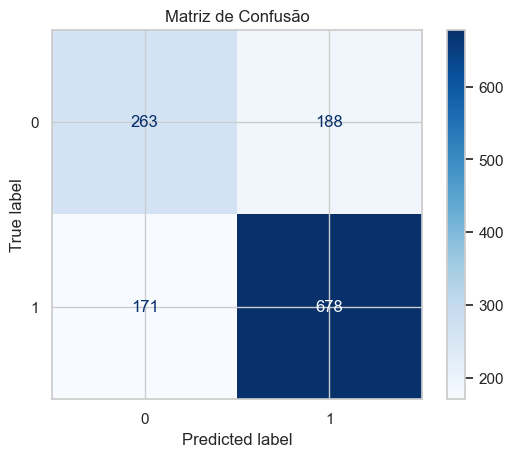

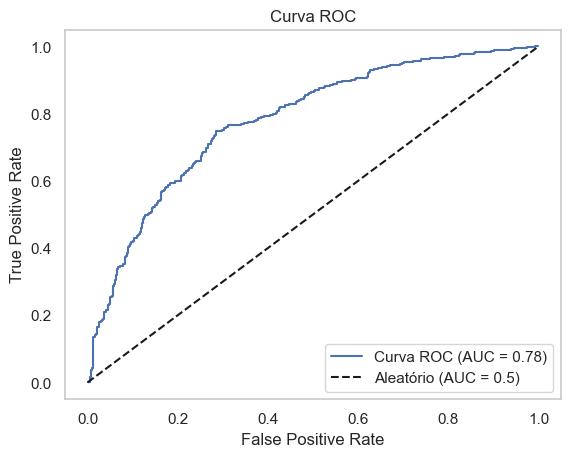

In [13]:
regressao = regressao_logistica(data_norm,"quality")

In [14]:
from sklearn.ensemble import RandomForestClassifier

def random_forest_classificacao(dataframe, target_col, n_estimators=100, max_depth=None, random_state=42, min_samples_split=2, min_samples_leaf=1):
    # Separar características (X) e rótulo (y)
    X = dataframe.drop(columns=[target_col])
    y = dataframe[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Treinamento do modelo Random Forest
    modelo = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=random_state,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf
    )
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    # Avaliação do modelo
    acuracia = accuracy_score(y_test, y_pred)
    precisao = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    print(f"Acurácia: {acuracia:.4f}")
    print(f"Precisão: {precisao:.4f}")
    print(f"Recall: {recall:.4f}")
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Exibição da matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
    disp.plot(cmap='Blues')
    plt.title("Matriz de Confusão")
    plt.show()

    # Exibição da curva ROC/AUC
    if len(modelo.classes_) > 2:
        # Multiclasse
        y_test_binarized = label_binarize(y_test, classes=modelo.classes_)
        y_pred_prob = modelo.predict_proba(X_test)
        for i, classe in enumerate(modelo.classes_):
            fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"Classe {classe} (AUC = {roc_auc:.2f})")
    else:
        # Binário
        y_pred_prob = modelo.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Curva ROC (AUC = {roc_auc:.2f})")
    
    plt.plot([0, 1], [0, 1], 'k--', label="Aleatório (AUC = 0.5)")
    plt.title("Curva ROC")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()
    return modelo, {"Acurácia": acuracia, "Precisão": precisao, "Recall": recall}

Acurácia: 0.8215
Precisão: 0.8208
Recall: 0.8215

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       451
           1       0.86      0.87      0.86       849

    accuracy                           0.82      1300
   macro avg       0.80      0.80      0.80      1300
weighted avg       0.82      0.82      0.82      1300



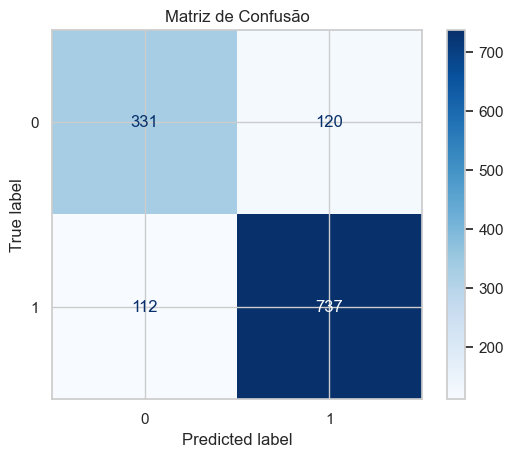

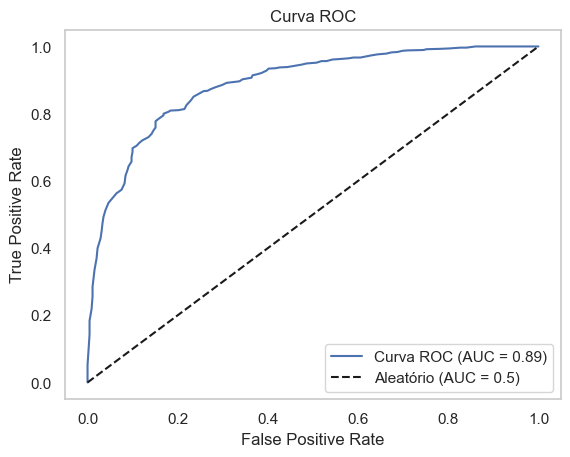

In [15]:
forest = random_forest_classificacao(data_norm,"quality")

In [16]:
from sklearn.svm import SVC

def svm_classificacao(dataframe, target_col, kernel='rbf', C=1.0, gamma='scale', random_state=42, degree=3):
    # Dividir em conjuntos de treino e teste
    X = dataframe.drop(columns=[target_col])
    y = dataframe[target_col]    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Treinar o modelo SVM
    modelo = SVC(kernel=kernel, C=C, gamma=gamma, random_state=random_state, degree=degree, probability=True)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    # Avaliação do modelo
    acuracia = accuracy_score(y_test, y_pred)
    precisao = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    print(f"Acurácia: {acuracia:.4f}")
    print(f"Precisão: {precisao:.4f}")
    print(f"Recall: {recall:.4f}")
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Exibição da matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
    disp.plot(cmap='Blues')
    plt.title("Matriz de Confusão")
    plt.show()

    # Exibição da curva ROC/AUC
    if len(modelo.classes_) > 2:
        # Multiclasse
        y_test_binarized = label_binarize(y_test, classes=modelo.classes_)
        y_pred_prob = modelo.predict_proba(X_test)
        for i, classe in enumerate(modelo.classes_):
            fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"Classe {classe} (AUC = {roc_auc:.2f})")
    else:
        # Binário
        y_pred_prob = modelo.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Curva ROC (AUC = {roc_auc:.2f})")
    
    plt.plot([0, 1], [0, 1], 'k--', label="Aleatório (AUC = 0.5)")
    plt.title("Curva ROC")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()
    return modelo, {"Acurácia": acuracia, "Precisão": precisao, "Recall": recall}

Acurácia: 0.7631
Precisão: 0.7619
Recall: 0.7631

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.66      0.65      0.65       451
           1       0.81      0.82      0.82       849

    accuracy                           0.76      1300
   macro avg       0.74      0.74      0.74      1300
weighted avg       0.76      0.76      0.76      1300



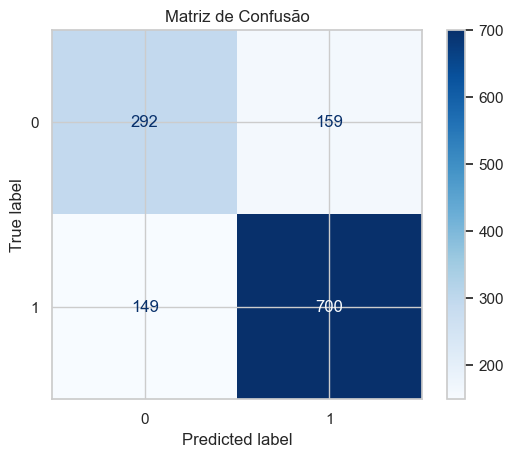

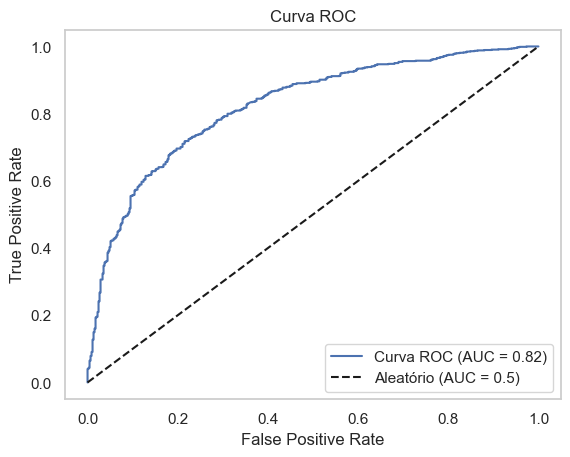

In [17]:
svm = svm_classificacao(data_norm,"quality")

### Otimização dos Modelos

1. **Busca de Hiperparâmetros**:  
   - Utilize **GridSearchCV** ou **RandomizedSearchCV** para realizar uma busca sistemática pelos melhores hiperparâmetros de cada modelo.

2. **Comparação de Resultados**:  
   - Compare o desempenho dos modelos antes e depois da otimização, utilizando as mesmas métricas de avaliação (Acurácia, Precisão, Revocação, F1-Score e ROC-AUC).


In [18]:
from sklearn.model_selection import RandomizedSearchCV

def buscar_melhores_hiperparametros(df, coluna_alvo, modelo, cv=5, scoring="accuracy", n_iter=50, random_state=42):
    # Dividir os dados em treino e teste
    X = df.drop(columns=[coluna_alvo])
    y = df[coluna_alvo]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    # Definir os hiperparâmetros com base no modelo
    if isinstance(modelo, RandomForestClassifier):
        param_dist = {
            "n_estimators": [50, 100, 200, 300],
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    elif isinstance(modelo, LogisticRegression):
        param_dist = {
            "solver": ["liblinear", "saga"],
            "penalty": ["l1", "l2", "elasticnet"],
            "C": [0.01, 0.1, 1, 10, 100],
            "max_iter": [100, 200, 500],
            # Adicionar l1_ratio apenas para 'saga' e 'elasticnet'
            "l1_ratio": [0.1, 0.5, 0.9] if modelo.solver == "saga" else [None]
        }
    elif isinstance(modelo, SVC):
        param_dist = {
            "C": [0.1, 1, 10, 100],
            "kernel": ["linear", "poly", "rbf", "sigmoid"],
            "gamma": ["scale", "auto"],
            "degree": [2, 3, 4]
        }
    else:
        raise ValueError(f"Modelo {type(modelo).__name__} não suportado.")
    
    # Remover combinações inválidas de parâmetros
    if isinstance(modelo, LogisticRegression):
        param_dist["penalty"] = [pen for pen in param_dist["penalty"] if pen != "elasticnet" or "saga" in param_dist["solver"]]
    
    # RandomizedSearchCV
    random_search = RandomizedSearchCV(
        modelo, param_distributions=param_dist, cv=cv, scoring=scoring, n_iter=n_iter, n_jobs=-1, random_state=random_state
    )
    random_search.fit(X_train, y_train)

    best_random_params = random_search.best_params_
    print("Resultados do RandomizedSearchCV:")
    print(best_random_params)
    print(f"Melhor Score ({scoring}): {random_search.best_score_:.4f}\n") 

In [19]:
buscar_melhores_hiperparametros(
    data_norm,
    "quality",
    LogisticRegression(random_state=42))

Resultados do RandomizedSearchCV:
{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100, 'l1_ratio': None, 'C': 0.1}
Melhor Score (accuracy): 0.7447



C:\Users\conta\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
80 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\conta\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\conta\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\conta\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = 

In [20]:
buscar_melhores_hiperparametros(
    data_norm,
    "quality",
    RandomForestClassifier(random_state=42))

Resultados do RandomizedSearchCV:
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30}
Melhor Score (accuracy): 0.8270



In [21]:
buscar_melhores_hiperparametros(
    data_norm,
    "quality",
    SVC(random_state=42))

Resultados do RandomizedSearchCV:
{'kernel': 'rbf', 'gamma': 'auto', 'degree': 4, 'C': 10}
Melhor Score (accuracy): 0.7816



Acurácia: 0.7254
Precisão: 0.7226
Recall: 0.7254

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.61      0.58      0.59       451
           1       0.78      0.80      0.79       849

    accuracy                           0.73      1300
   macro avg       0.70      0.69      0.69      1300
weighted avg       0.72      0.73      0.72      1300



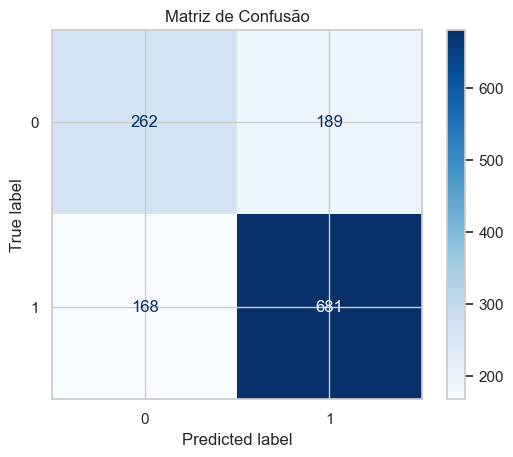

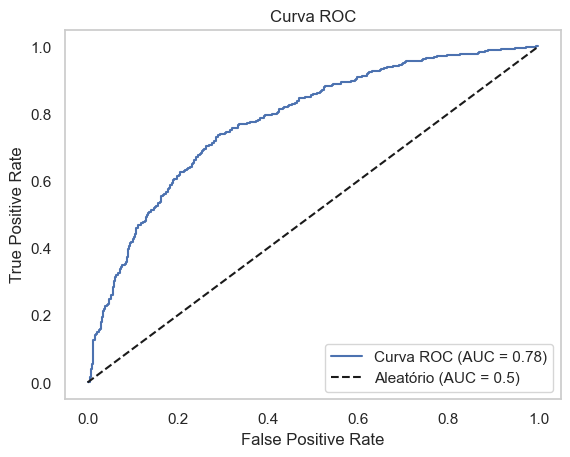

In [22]:
regressao_pos = regressao_logistica(data_norm,"quality",solver='liblinear', penalty = 'l1',max_iter = 100, l1_ratio= None, C=0.1)

Acurácia: 0.8208
Precisão: 0.8200
Recall: 0.8208

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       451
           1       0.86      0.87      0.86       849

    accuracy                           0.82      1300
   macro avg       0.80      0.80      0.80      1300
weighted avg       0.82      0.82      0.82      1300



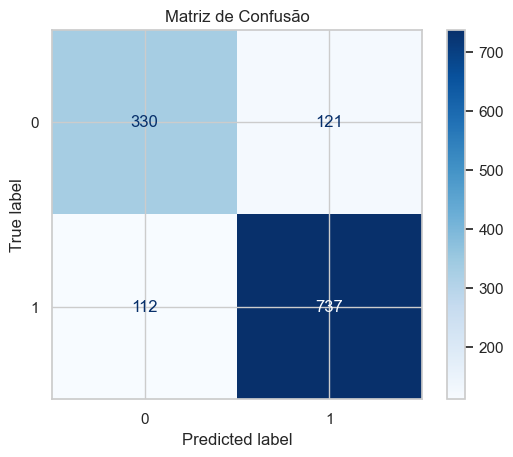

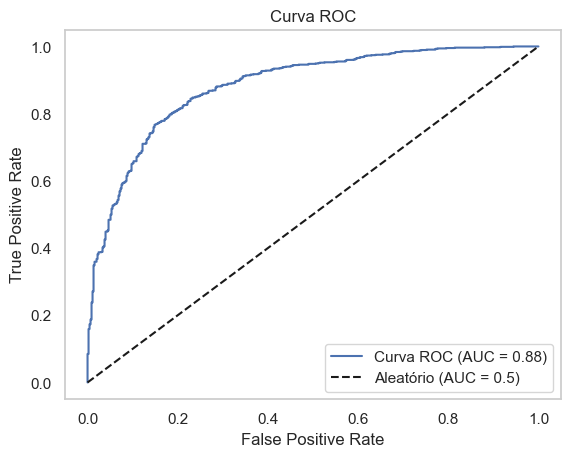

In [23]:
forest_pos = random_forest_classificacao(data_norm,"quality",n_estimators = 100,min_samples_split = 5, min_samples_leaf = 1, max_depth = 30)

Acurácia: 0.7754
Precisão: 0.7788
Recall: 0.7754

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       451
           1       0.84      0.81      0.83       849

    accuracy                           0.78      1300
   macro avg       0.75      0.76      0.76      1300
weighted avg       0.78      0.78      0.78      1300



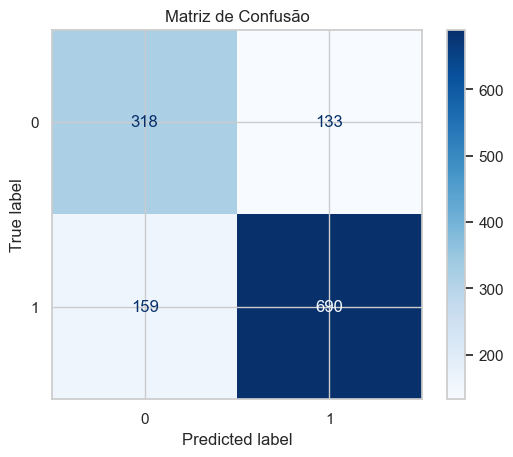

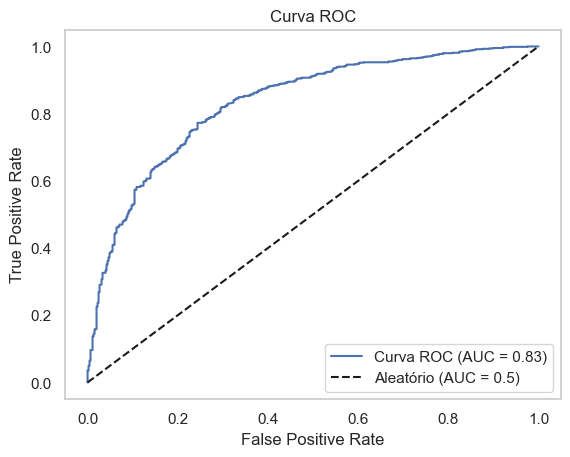

In [24]:
svm_pos = svm_classificacao(data_norm,"quality",kernel ='rbf',gamma ='auto',degree = 4,C=10)

In [25]:
import numpy as np

def comparar_metricas(resultado1, resultado2):
    # Extrair métricas e valores
    modelo1, resultados1 = resultado1
    modelo2, resultados2 = resultado2
    metricas = list(resultados1.keys())
    valores1 = [resultados1[m] for m in metricas]
    valores2 = [resultados2[m] for m in metricas]
    
    # Criar gráfico
    x = np.arange(len(metricas)) 
    largura = 0.35
    fig, ax = plt.subplots(figsize=(8, 5))
    barras1 = ax.bar(x - largura/2, valores1, largura, label=str(modelo1), color='skyblue')
    barras2 = ax.bar(x + largura/2, valores2, largura, label=str(modelo2), color='salmon')
    
    # Adicionar rótulos e título
    ax.set_ylabel('Valores das Métricas')
    ax.set_title('Comparação de Métricas entre Modelos')
    ax.set_xticks(x)
    ax.set_xticklabels(metricas)
    ax.legend(title="Modelos")
    
    # Adicionar valores nas barras
    for barras in [barras1, barras2]:
        for barra in barras:
            altura = barra.get_height()
            ax.annotate(f'{altura:.4f}', 
                        xy=(barra.get_x() + barra.get_width() / 2, altura),
                        xytext=(0, 3),  # Margem acima da barra
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()

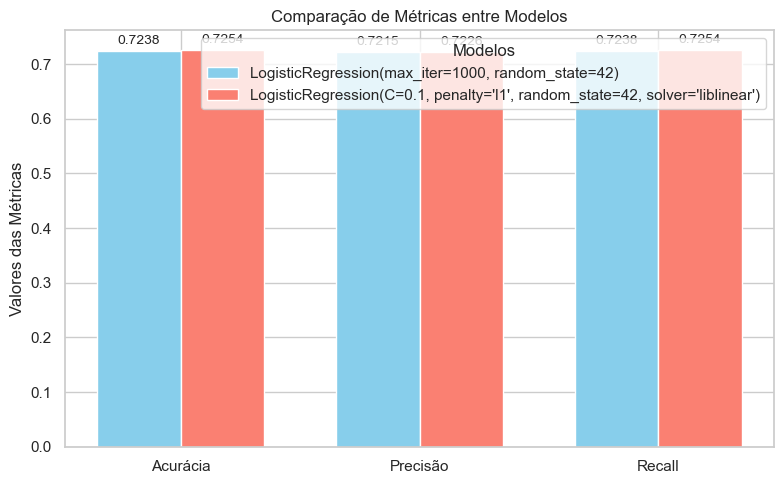

In [26]:
comparar_metricas(regressao,regressao_pos)

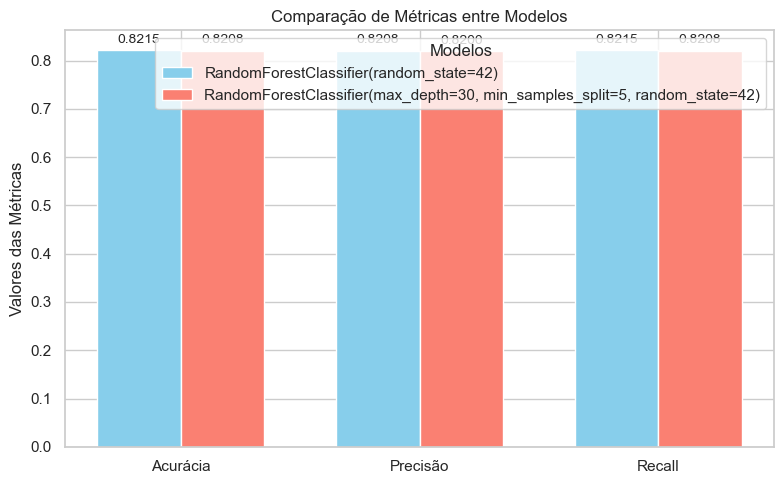

In [27]:
comparar_metricas(forest,forest_pos)

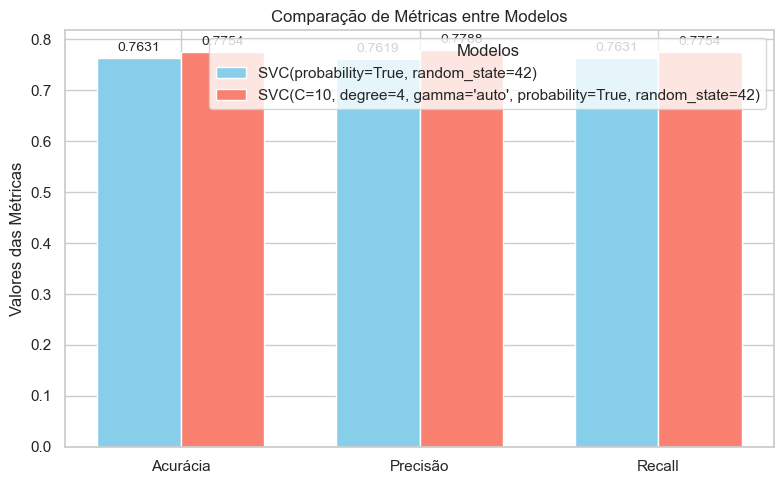

In [28]:
comparar_metricas(svm,svm_pos)

- É possível ver uma pequena melhora apenas no modelo de SVC 

### Interpretação dos Resultados

1. **Discussão dos Resultados Obtidos**:  
   - Analise qual modelo apresentou o melhor desempenho e justifique com base nas métricas avaliadas.  
   - Identifique as variáveis físico-químicas que mais influenciaram na predição da qualidade do vinho.  

2. **Possíveis Melhorias e Limitações**:  
   - Discuta melhorias que poderiam ser implementadas no pipeline, como a inclusão de novas features ou ajuste de estratégias de pré-processamento.  
   - Identifique as principais limitações do estudo, como possíveis vieses nos dados ou restrições dos modelos utilizados.


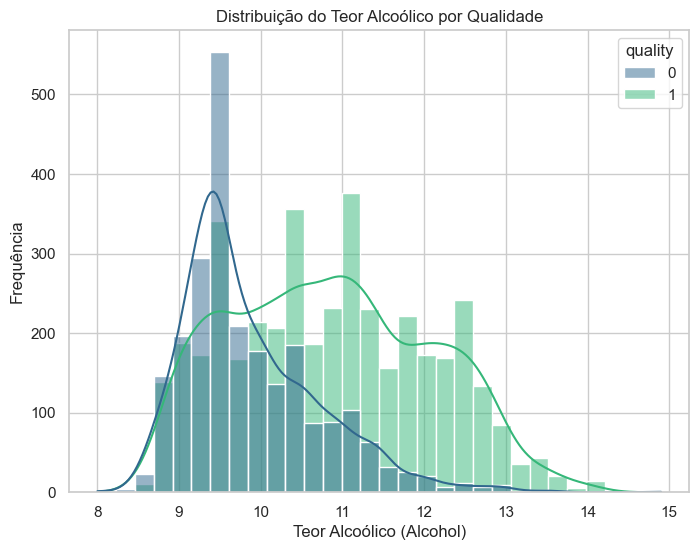

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='alcohol', hue='quality', kde=True, palette='viridis', bins=30)
plt.title('Distribuição do Teor Alcoólico por Qualidade')
plt.xlabel('Teor Alcoólico (Alcohol)')
plt.ylabel('Frequência')
plt.show()

In [30]:
# Separando vinhos pelo tipo 
red = data[data['color'] == 1] 
white = data[data['color'] == 0]

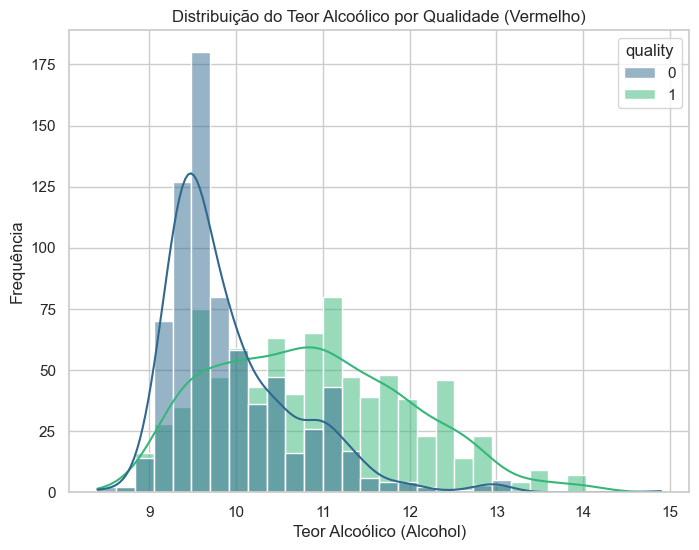

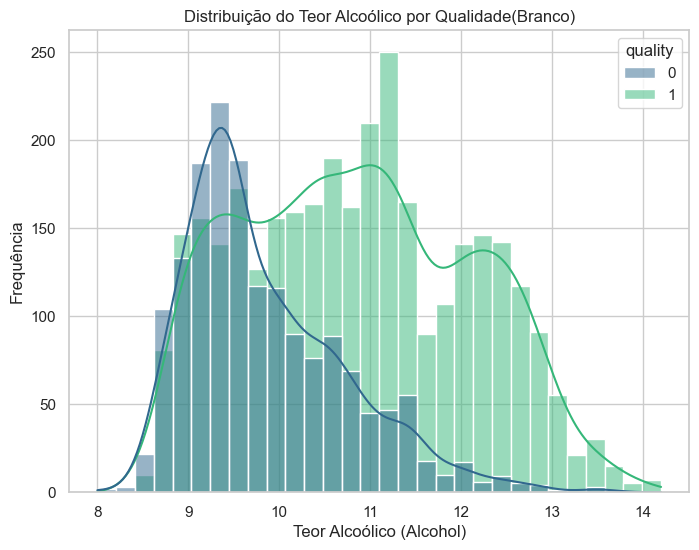

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(data=red, x='alcohol', hue='quality', kde=True, palette='viridis', bins=30)
plt.title('Distribuição do Teor Alcoólico por Qualidade (Vermelho)')
plt.xlabel('Teor Alcoólico (Alcohol)')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data=white, x='alcohol', hue='quality', kde=True, palette='viridis', bins=30)
plt.title('Distribuição do Teor Alcoólico por Qualidade(Branco)')
plt.xlabel('Teor Alcoólico (Alcohol)')
plt.ylabel('Frequência')
plt.show()

- Entre Vinhos com teor alcoólico alto, a frequência de valores abaixo do limiar de qualidade é menor

Acurácia: 0.8000
Precisão: 0.8003
Recall: 0.8000

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       141
           1       0.82      0.82      0.82       179

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320



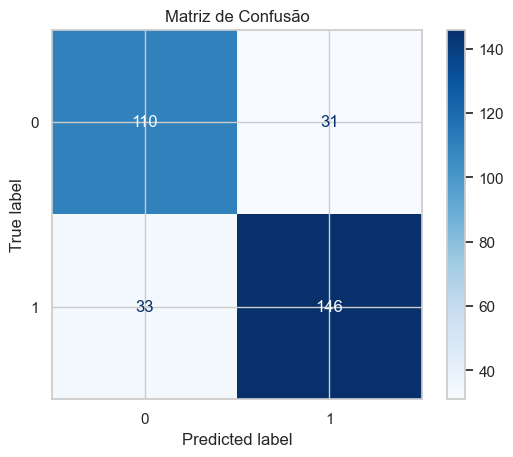

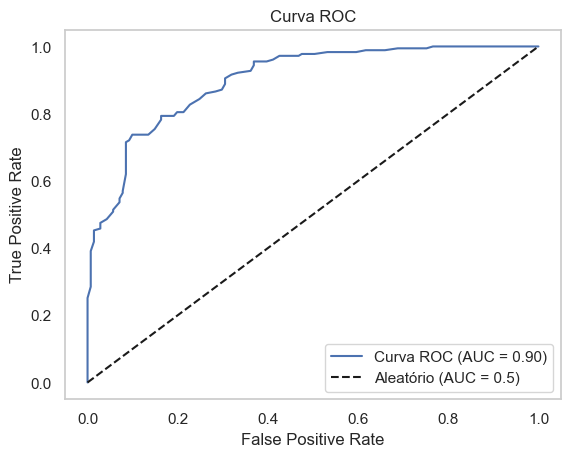

(RandomForestClassifier(random_state=42),
 {'Acurácia': 0.8, 'Precisão': 0.8003476749239461, 'Recall': 0.8})

In [32]:
random_forest_classificacao(red,"quality")

Acurácia: 0.8520
Precisão: 0.8500
Recall: 0.8520

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       321
           1       0.87      0.91      0.89       659

    accuracy                           0.85       980
   macro avg       0.84      0.82      0.83       980
weighted avg       0.85      0.85      0.85       980



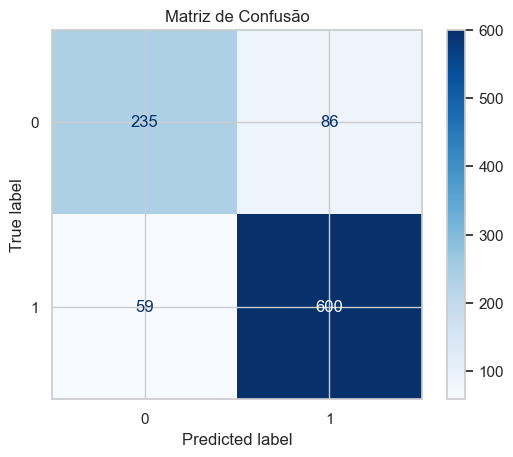

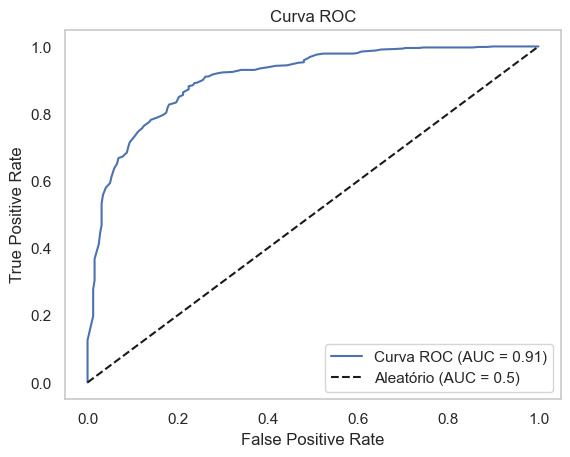

(RandomForestClassifier(random_state=42),
 {'Acurácia': 0.8520408163265306,
  'Precisão': 0.8499657880644969,
  'Recall': 0.8520408163265306})

In [33]:
random_forest_classificacao(white,"quality")

Acurácia: 0.7375
Precisão: 0.7421
Recall: 0.7375

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.68      0.75      0.72       141
           1       0.79      0.73      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



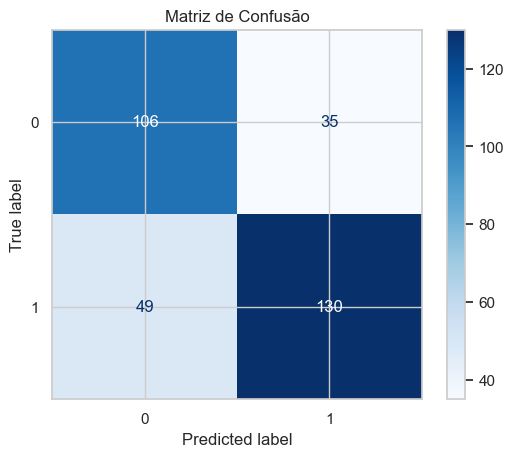

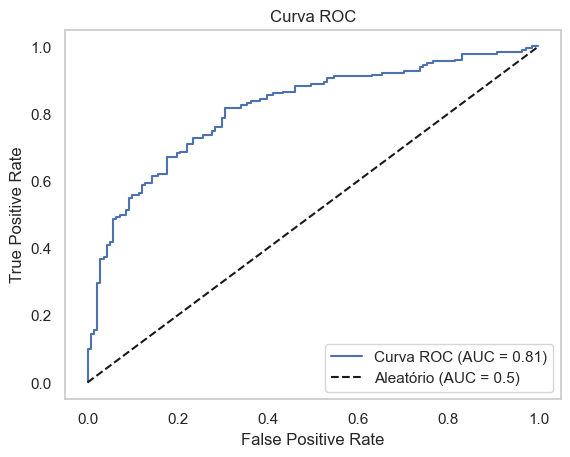

(LogisticRegression(max_iter=1000, random_state=42),
 {'Acurácia': 0.7375, 'Precisão': 0.7420503421309872, 'Recall': 0.7375})

In [34]:
regressao_logistica(red,"quality")

- Já o tipo de vinho tem pouco impacto na precisão do modelo na tarefa de classificação.